## Prediction using Decision Tree Algorithm
### Author:Anam Nawaz Khan
### Internship: LGMVIP-DataScience
#### purpose:
if we feed any new data to this classifier, it would be able to predict the right class accordingly

### Import Libraries:

In [37]:
import sklearn.datasets as datasets
import pandas as pd
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  # Import necessary libraries for graph viz
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
import graphviz
import matplotlib.image as mpimg

### Uploading DataSet

In [13]:
df= pd.read_csv('Iris.csv')

In [14]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
type(df)

pandas.core.frame.DataFrame

### Model Creation

In [16]:
## Creating independent and dependent variable
X = df.drop('Species', axis=1)  #independent variable 
y = df.Species         #dependent variable 

In [17]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


### Drop Id column

In [29]:
df.drop(['Id'], axis=1 ,inplace=True)

In [30]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Object Creation for Decision Tree

In [34]:
dt=DecisionTreeClassifier (criterion='entropy', max_depth=10, min_samples_leaf=1, min_samples_split=3,splitter='random')

In [35]:
#model fit
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

### Visualization
Visualize the Decision Tree.

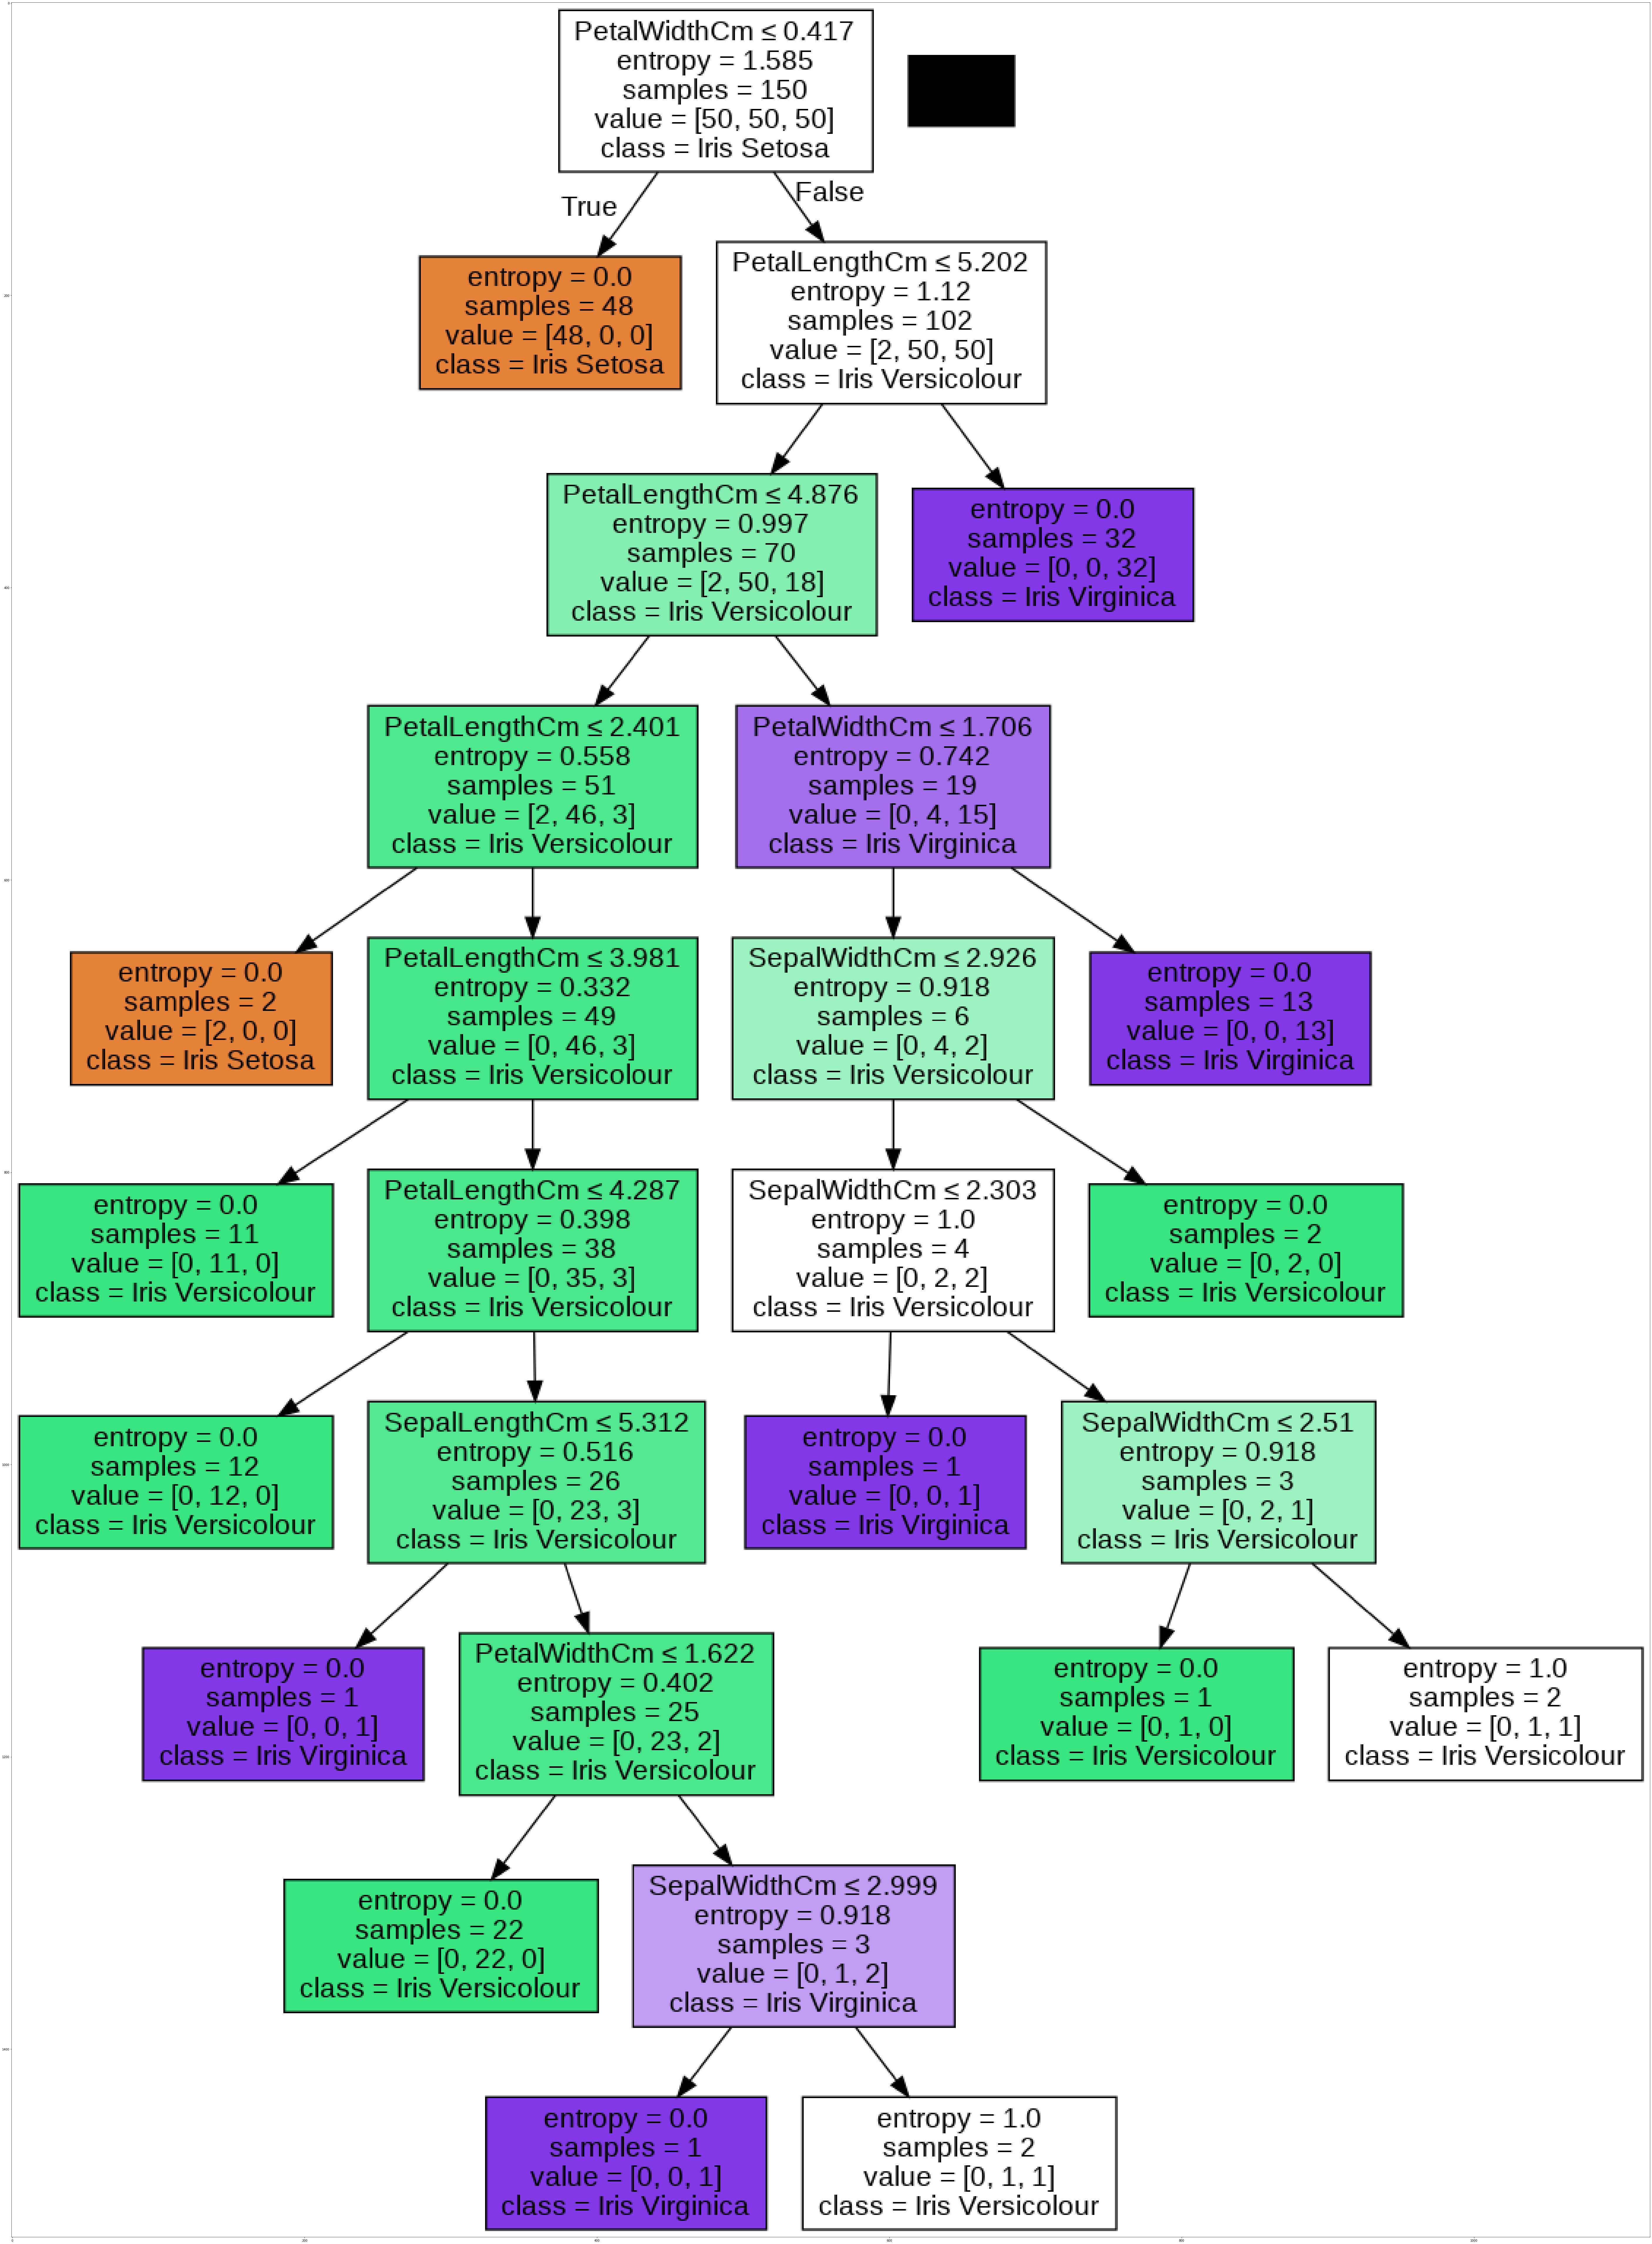

In [39]:
#initialize a StringIO class
dot_data = StringIO()

#file name to save the image
filename = "iris_flower_tree.png"

feature_names = [ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] #input values
class_names = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'] #output values

#convert the decision tree model into dot data
out = export_graphviz(dt,
                      feature_names=feature_names,
                      out_file=dot_data,
                      class_names=class_names,
                      filled=True,
                      special_characters=True,
                      rotate=False)

#convert the dot data into a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#save the graph
graph.write_png(filename)

#open and plot the graph
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest');